<a href="https://colab.research.google.com/github/SepehrSepehri/DataForGoodWR/blob/main/DataForGood_v4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Collecting and Analyzing Twitter Data

## **Accessing web APIs**
<br>

**Background:**


*Application Program Interfaces (APIs) are sets of protocols that govern interactions between sites and users.*

APIs are similar to web browsers but Web APIs manage and organize data.

For public APIs, many sites only allow authorized users:
*Twitter, Facebook, Instagram, Github, etc.*

<br>



**Twitter APIs:**

To connect to Twitter's APIs, users need a consumer key and consumer secret, which you can get by creating a Twitter app.



Creating a Twitter App
1. Log in to your [Twitter.com](https://) account
2. Go to [apps.twitter.com](https://)
3. Select: Create New App

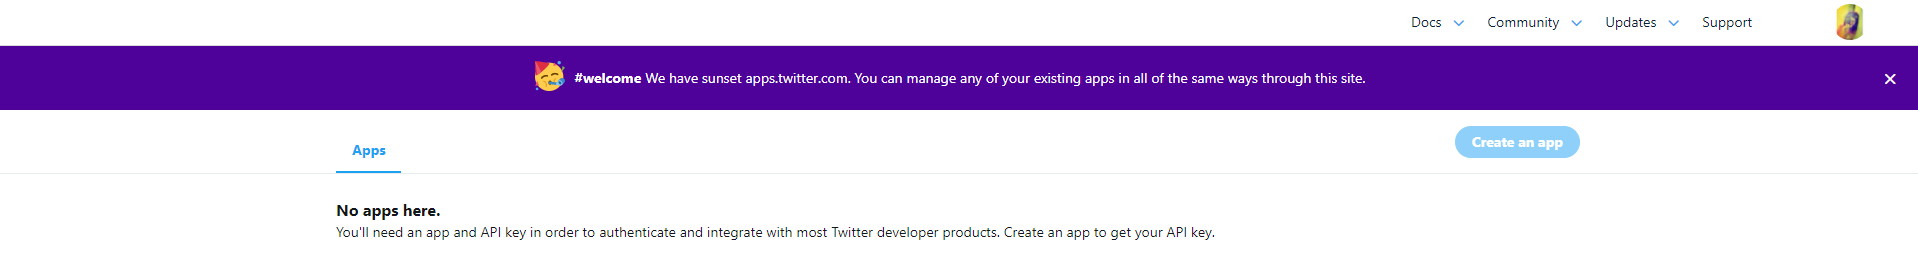

Complete the fields (important: Callback URL must be exact)


*   Name: twitter_app
*   Description: something about analyzing Twitter data
*   Website: https://twitter.com/{{you_screen_name}}
*   Callback URL: http://127.0.0.1:1410

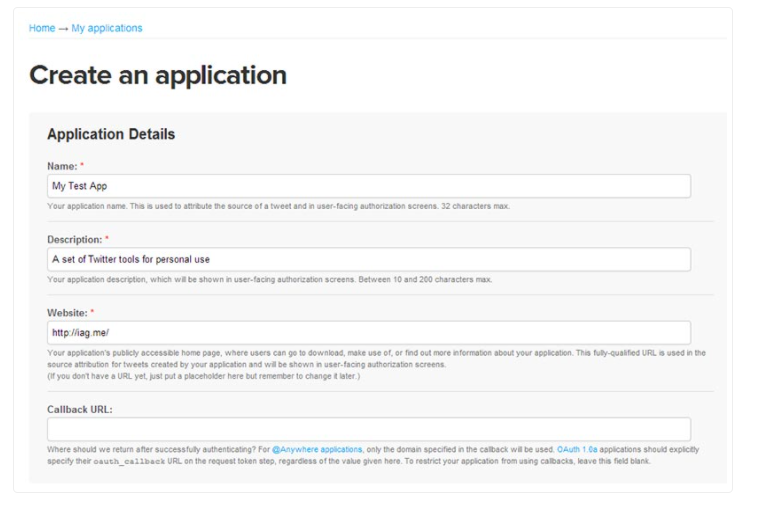

Copy the keys

*   Click Create your Twitter application
*   Select Keys and Access Tokens tab
*   Copy the Consumer Key (API Key) and Consumer Secret (API Secret) and paste into R script

In [321]:
consumer_key= 'XXXXXXXXXXXXXXXXXXXXXXXXXXXX'
consumer_secret= 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXx'
access_token= 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXx'
access_token_secret= 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXx'




In [2]:
# importing libraries:
import tweepy as tw
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [3]:
# connecting to twitter API and Creating API object
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

1. Data exploration

*   Read in the tweets data using pandas
*   Explore the data


Some ideas of things to look for:



*   the dimensions of the data
*   get DataFrame info
*   get summary statistics
*   get the value counts of categoric columns
*   count missing values


In [4]:
# Define Supporting fucntions extract url and hashtags from data:
def url_tweet(url_arg):
  for url in url_arg:
    return url['expanded_url']

    # Sepehr: I defined this function to extract hashtags:
def hashtag_tweet(entity_arg):
  for entity in entity_arg:
    return entity['text']

# Define a fucntion to extract tweets from a twitter account timeline and save them in a Pandas Dataframe:
def tweet(user):
  tweets = tw.Cursor(api.user_timeline,
                   screen_name=user,
                   lang="en",
                   since="2010-01-20",
                   until='2021-02-28').items(10000)


  users_locs = [[tweet.user.id,tweet.created_at,tweet.user.screen_name, tweet.text,
               tweet.user.location,tweet.favorite_count,tweet.retweet_count,
               tweet.user.followers_count,tweet.user.friends_count,
               url_tweet(tweet.entities['urls']),hashtag_tweet(tweet.entities['hashtags']) ] for tweet in tweets]

  tweet_text = pd.DataFrame(data=users_locs, 
                    columns=['ID','created_at', 'screen_name','text', 'location',
                             'favorite_count', 'retweet_count','followers_count','friends_count',
                             'URL','hashtags'])

  # Sepehr: I added entities to the list. We need hashtags from entities
     
  return tweet_text




In [5]:
# Extracting tweets from Waterloo Public Library twitter account:
df_waterloo = tweet("@WaterlooLibrary")
#df_kitchener = tweet("@KitchLibrary")


In [6]:
df_waterloo.shape


(3248, 11)

In [7]:
# Extracting tweets from Kitchener Public Library twitter account:
df_kitchener = tweet("@KitchLibrary")

In [8]:
df_kitchener.shape

(3243, 11)

In [9]:
# Combining (Concatenating) two dataframes
#df = [df_waterloo, df_kitchener]
#concatenate dataframes
df = pd.concat([df_waterloo, df_kitchener])
# reset index
df.reset_index(drop=True, inplace=True)
df.head()

ID  ... hashtags
0  31035514  ...     None
1  31035514  ...     None
2  31035514  ...     None
3  31035514  ...     None
4  31035514  ...     None

[5 rows x 11 columns]

In [10]:
df['text'][1]

'RT @CreateWaterloo: Give us a call ☎️ https://t.co/WQlSiArcr2'

In [11]:
df.iloc[:,3][4]

'Viet Thanh Nguyen on Ralph Ellison, Alice Walker, and Tintin : 10 rapid-fire book recommendations from the Pulitzer… https://t.co/EWYITFOPRw'

In [12]:
df.iloc[:,9][4]

'https://twitter.com/i/web/status/1369709889682038791'

In [13]:
# number of rows and columns
df.shape

(6491, 11)

In [14]:
# print types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6491 entries, 0 to 6490
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               6491 non-null   int64         
 1   created_at       6491 non-null   datetime64[ns]
 2   screen_name      6491 non-null   object        
 3   text             6491 non-null   object        
 4   location         6491 non-null   object        
 5   favorite_count   6491 non-null   int64         
 6   retweet_count    6491 non-null   int64         
 7   followers_count  6491 non-null   int64         
 8   friends_count    6491 non-null   int64         
 9   URL              4771 non-null   object        
 10  hashtags         855 non-null    object        
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 557.9+ KB


In [15]:
df.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


ID           created_at  ...                 URL hashtags
count   6.491000e+03                 6491  ...                4771      855
unique           NaN                 6488  ...                4745      481
top              NaN  2020-06-18 14:05:00  ...  http://NYTimes.com  85Queen
freq             NaN                    2  ...                   6       42
first            NaN  2019-01-23 20:34:42  ...                 NaN      NaN
last             NaN  2021-03-11 15:05:00  ...                 NaN      NaN
mean    2.279254e+08                  NaN  ...                 NaN      NaN
std     1.970568e+08                  NaN  ...                 NaN      NaN
min     3.103551e+07                  NaN  ...                 NaN      NaN
25%     3.103551e+07                  NaN  ...                 NaN      NaN
50%     3.103551e+07                  NaN  ...                 NaN      NaN
75%     4.251189e+08                  NaN  ...                 NaN      NaN
max     4.251189e+08                  NaN  ...                 NaN      NaN

[13 rows x 11 columns]

In [16]:
df['location'].value_counts()

Waterloo, Ontario, Canada     3248
Kitchener, Ontario, Canada    3243
Name: location, dtype: int64

In [17]:
df.isnull().sum()

ID                    0
created_at            0
screen_name           0
text                  0
location              0
favorite_count        0
retweet_count         0
followers_count       0
friends_count         0
URL                1720
hashtags           5636
dtype: int64

# Dealing with text data

Pandas has many methods for working with text data. We can use these to create features from our tweet text.

A full list of these string methods can be found at: https://pandas.pydata.org/pandas-docs/stable/text.html

*   Create a new column called num_chars that is the number of characters in each tweet
*   Create a new column called num_words that is a count of how many words in each tweet
*   Create a new column called num_ats that is a count of how many @ symbols in each

*   Noise cleaning: Eliminating meaningless and repetitive words, which are not helping in concluding the result such as RT-@-#-URLs-#-usernames, etc.
*   Stop-Words Removal: The next important step is removing the stop words. These words are usually meaningless and carry no or little importance in a sentence. Removing these words makes the sentence simpler. Examples of such words include the, a, an, as, he, she, etc. Stop words are more likely to occur repeatedly into the review of users
*   Stemming: Alternate word suffixes and decrease the words’ length to their root forms such as changing "clean", "cleaner", "cleaning", and "cleaned" to the base form of "clean".

















In [18]:
# Sepehr: Remove retweet indicator such as  RT @WaterlooLibrary:
import re
#Extract retweet from the text and save it in 'retween' column:
df['retweet']=df['text'].str.findall(r'RT (@\w+):')

# remove retweet from the text:
def remove_RT(txt):
    return re.sub(r'RT @\w+:',r'', txt) 
df['text']=  [remove_RT(tweet) for tweet in  df['text']]
df['text']

0       This is it! They are down to the final two boo...
1               Give us a call ☎️ https://t.co/WQlSiArcr2
2       Maybe it’s because we’ve been stuck inside for...
3       Register now for this lecture with our partner...
4       Viet Thanh Nguyen on Ralph Ellison, Alice Walk...
                              ...                        
6486    Congratulations to @mississaugalib! We're exci...
6487     Who else loves reading and listening to books...
6488    @carrie_m 🙋🏽‍♀️ I do! Thanks for sharing this,...
6489     Coming up next in our winter Film Series at @...
6490    ❄️❄️❄️❄️❄️❄️❄️\n❄️🚗 beep beep 🚗❄️\n❄️❄️❄️❄️❄️❄...
Name: text, Length: 6491, dtype: object

In [19]:
# number of characters
df['num_chars'] = df['text'].str.len()
# number of words
df['num_words'] = df['text'].str.count(' ') + 1
# number of "@" symbols
df['num_ats'] = df['text'].str.count('@')

In [20]:
df['tokens'] = [m.lower() for m in df['text']]
df.head()



ID  ...                                             tokens
0  31035514  ...  this is it! they are down to the final two boo...
1  31035514  ...          give us a call ☎️ https://t.co/wqlsiarcr2
2  31035514  ...  maybe it’s because we’ve been stuck inside for...
3  31035514  ...  register now for this lecture with our partner...
4  31035514  ...  viet thanh nguyen on ralph ellison, alice walk...

[5 rows x 16 columns]

In [21]:
# importing libraries
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')  
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer
import pandas as pd
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
df2 = df
df['text'].iloc[1]

' Give us a call ☎️ https://t.co/WQlSiArcr2'

In [23]:
# Definig a function fot removing urls from the text
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [24]:
# Removing the urls
all_tweets_no_urls = [remove_url(tweet) for tweet in df2.iloc[:,3]]
all_tweets_no_urls[:5]

['This is it They are down to the final two books in Canada Reads 2021 Debates begins today at 11am ET Which book',
 'Give us a call',
 'Maybe its because weve been stuck inside for a year Maybe its because spring is almost here Whatever the reaso',
 'Register now for this lecture with our partners from LaurierEdu at',
 'Viet Thanh Nguyen on Ralph Ellison Alice Walker and Tintin 10 rapidfire book recommendations from the Pulitzer']

In [25]:
 stop_words = set(stopwords.words('english'))
# View a few words from the set
list(stop_words)[0:10]

['now', 'your', 'wasn', 'you', 'out', 'whom', 'isn', 'no', 'these', "you're"]

In [26]:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
#words_in_tweet[:2]
#words_in_tweet[1]

In [27]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

#tweets_nsw[0]
tweets_nsw_join = [' '.join(tweet) for tweet in tweets_nsw]
tweets_nsw_join[:5]

['final two books canada reads 2021 debates begins today 11am et book',
 'give us call',
 'maybe weve stuck inside year maybe spring almost whatever reaso',
 'register lecture partners laurieredu',
 'viet thanh nguyen ralph ellison alice walker tintin 10 rapidfire book recommendations pulitzer']

In [28]:
# len(tweets_nsw_join) 6483
df['Clean_text'] = tweets_nsw_join
df.head()

ID  ...                                         Clean_text
0  31035514  ...  final two books canada reads 2021 debates begi...
1  31035514  ...                                       give us call
2  31035514  ...  maybe weve stuck inside year maybe spring almo...
3  31035514  ...               register lecture partners laurieredu
4  31035514  ...  viet thanh nguyen ralph ellison alice walker t...

[5 rows x 17 columns]

In [29]:
# stem
tokens = ['we', 'all', 'liked', 'the', 'movie']
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
[ps.stem(x) for x in tokens]


['we', 'all', 'like', 'the', 'movi']

In [30]:
stemmer = PorterStemmer()
tweets_clean = [[stemmer.stem(x) for x in m] for m in tweets_nsw]
tweets_clean_join = [' '.join(tweet) for tweet in tweets_clean]
tweets_clean_join[:5]

['final two book canada read 2021 debat begin today 11am et book',
 'give us call',
 'mayb weve stuck insid year mayb spring almost whatev reaso',
 'regist lectur partner laurieredu',
 'viet thanh nguyen ralph ellison alic walker tintin 10 rapidfir book recommend pulitz']

**Sentiment Analysis with positive/negative words**

We can determine how many positive and negative words are being used in each tweet by comparing them to a predefined list of words.                             
This helps us in using external data to help build features.

We borrowed our list of pos/neg words from this study: 
https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html


In [31]:
pos_words = pd.read_csv('https://raw.githubusercontent.com/nick-wcd/cbc/master/positive-words.txt', skiprows=35, names=['words'])
pos_words = pos_words['words'].values.tolist()

#pos_words

In [32]:
neg_words = pd.read_csv('https://raw.githubusercontent.com/nick-wcd/cbc/master/negative-words.txt', skiprows=35, names=['words'])
neg_words = neg_words['words'].values.tolist()

#neg_words

In [33]:
len(neg_words)

4783

In [34]:
def count_words(tweet, words):
    count = 0
    for word in tweet.split():
        if word in words:
            count += 1
    return count

In [35]:
# count the number of positive and negative words in each tweet
df['pos_count'] = df['Clean_text'].apply(count_words, words=pos_words)
df['neg_count'] = df['Clean_text'].apply(count_words, words=neg_words)

In [36]:
df.head()

ID          created_at  ... pos_count neg_count
0  31035514 2021-03-11 15:05:00  ...         0         0
1  31035514 2021-03-11 14:10:02  ...         0         0
2  31035514 2021-03-11 00:00:01  ...         0         1
3  31035514 2021-03-10 20:21:21  ...         0         0
4  31035514 2021-03-10 18:01:00  ...         1         0

[5 rows x 19 columns]

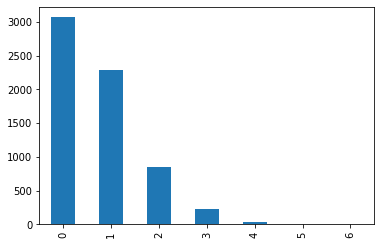

In [37]:
df['pos_count'].value_counts().plot(kind='bar')

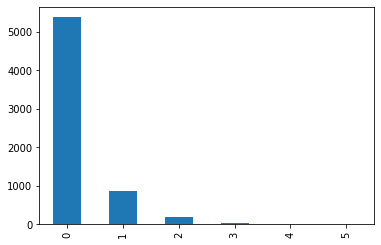

In [38]:
df['neg_count'].value_counts().plot(kind='bar')

# Sepehr: 
---
# Further Data Cleaning:
*   Removing emojies
*   Removing punctuations
*   Tokenization
*   Lemmatization
      * Part of Speech Tagging
      * WordNet
---



# Exploratory Data Analysis (EDA) and Analysis:

*   Words Frequency Distributions
*   wordcloud
## Sentiment Analysis
*   Hashtags in positive VS tweets negative tweets
## Topic Modeling

*   Fine Tuning the Parameters



---


# Further Data Cleaning

In [250]:
# Creating a new column for processing data cleaning
df['text1']=df['text']

# Remowing no
df['text1']=df['text1'].str.strip()
df['text1']=df['text1'].str.lower()

In [251]:
# Defining a function for removing urls from the text
#def remove_url(txt):
#    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

def remove_url(text):
    return re.sub(r'https?://.*\b','',text)

df['text1']=df['text1'].apply(lambda x: remove_url(x))

In [252]:
df['text'].iloc[4]

'Viet Thanh Nguyen on Ralph Ellison, Alice Walker, and Tintin : 10 rapid-fire book recommendations from the Pulitzer… https://t.co/EWYITFOPRw'

In [253]:
df['text1'].iloc[4]

'viet thanh nguyen on ralph ellison, alice walker, and tintin : 10 rapid-fire book recommendations from the pulitzer… '

###   Removing Emojis

In [254]:
# Removing emojis from the text
# The following function revomes the emojis from text. 'apply' function should be used for each text.
# Apply function: Objects passed to the function are Series objects whose index is either the DataFrame’s index (axis=0) or the DataFrame’s columns (axis=1). 

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
df['text1']=df['text1'].apply(lambda x: remove_emoji(x))

#Full list of emojies: https://unicode.org/emoji/charts/full-emoji-list.html

In [255]:
df['text'].iloc[6417]

'EXCUSE ME?! Not OK. https://t.co/9HG4JnoAIj'

In [256]:
df['text1'].iloc[6417]

'excuse me?! not ok. '

Another approach is to replace the emojis with the equivalent words.
You can try it.

### Removing Punctuations
**string** is a pre-built module in python for workingwith strings

In [257]:
# We use the list of punctuations in the string module for removing the punctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [258]:
# Defining a supporting function for removing Punctuations
def remove_punc(text):
    return text.translate(text.maketrans('','',string.punctuation))
df['text1']=df['text1'].apply(lambda x: remove_punc(x))


In [259]:
df['text'].iloc[0]

'This is it! They are down to the final two books in Canada Reads 2021. Debates begins today at 11am ET. Which book… https://t.co/4mHhSOyyAY'

In [260]:
df['text1'].iloc[0]

'this is it they are down to the final two books in canada reads 2021 debates begins today at 11am et which book… '

After removing unnecessary characters from the text, we can tokenize it.

**Tokenization** is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

In [261]:
# Tokenizing by using nltk word tokenizer:
from nltk import word_tokenize


df['tokenized']=df['text1'].apply(word_tokenize)


# Removing stop words
# from nltk.corpus import stopwords
#stop = set(stopwords.words('english'))
#df['tokenized'] = df['tokenized'].apply(lambda x: [word for word in x if word not in stop])

df.head()


ID          created_at  ...               nouns            nouns_adjs
0  31035514 2021-03-11 15:05:00  ...               today           final today
1  31035514 2021-03-11 14:10:02  ...                call                  call
2  31035514 2021-03-11 00:00:01  ...  year spring reaso…  s year spring reaso…
3  31035514 2021-03-10 20:21:21  ...             lecture               lecture
4  31035514 2021-03-10 18:01:00  ...      rapidfire book        rapidfire book

[5 rows x 29 columns]

## Lemmatization
**The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.**

***Stemming*** usually refers to a ***crude heuristic process*** that **chops off the ends of words** in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. 

***Lemmatization*** usually refers to doing things properly with the **use of a vocabulary and morphological analysis of words**, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma. 

Example: 
token saw:
stemming:

*   --> s

lemmatization:
*   saw (noun) --> saw
*   saw (verb) --> see

Resource: https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html

### Part of Speach (POS) tagging
part-of-speech tagging, takes a sequence of words and assignes each word a part of speech like NOUN or VERB

In [262]:
# Downloading and importing wordnet
# downloading wordet
nltk.download('wordnet')

# downloading averaged_perceptron_tagger
nltk.download('averaged_perceptron_tagger')

# importing wordnet from nltk.corpus
from nltk.corpus import wordnet


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [263]:
# defining supporting functions to get the POS tags
def defualt_pos_tagger (token):
    tags=nltk.pos_tag(token)
    return tags

df['defualt_postag']=df['tokenized'].apply(defualt_pos_tagger)

### WordNet

***WordNet®*** is a large lexical database of English. Nouns, verbs, adjectives and adverbs are grouped into sets of cognitive synonyms (synsets), each expressing a distinct concept. Synsets are interlinked by means of conceptual-semantic and lexical relations.
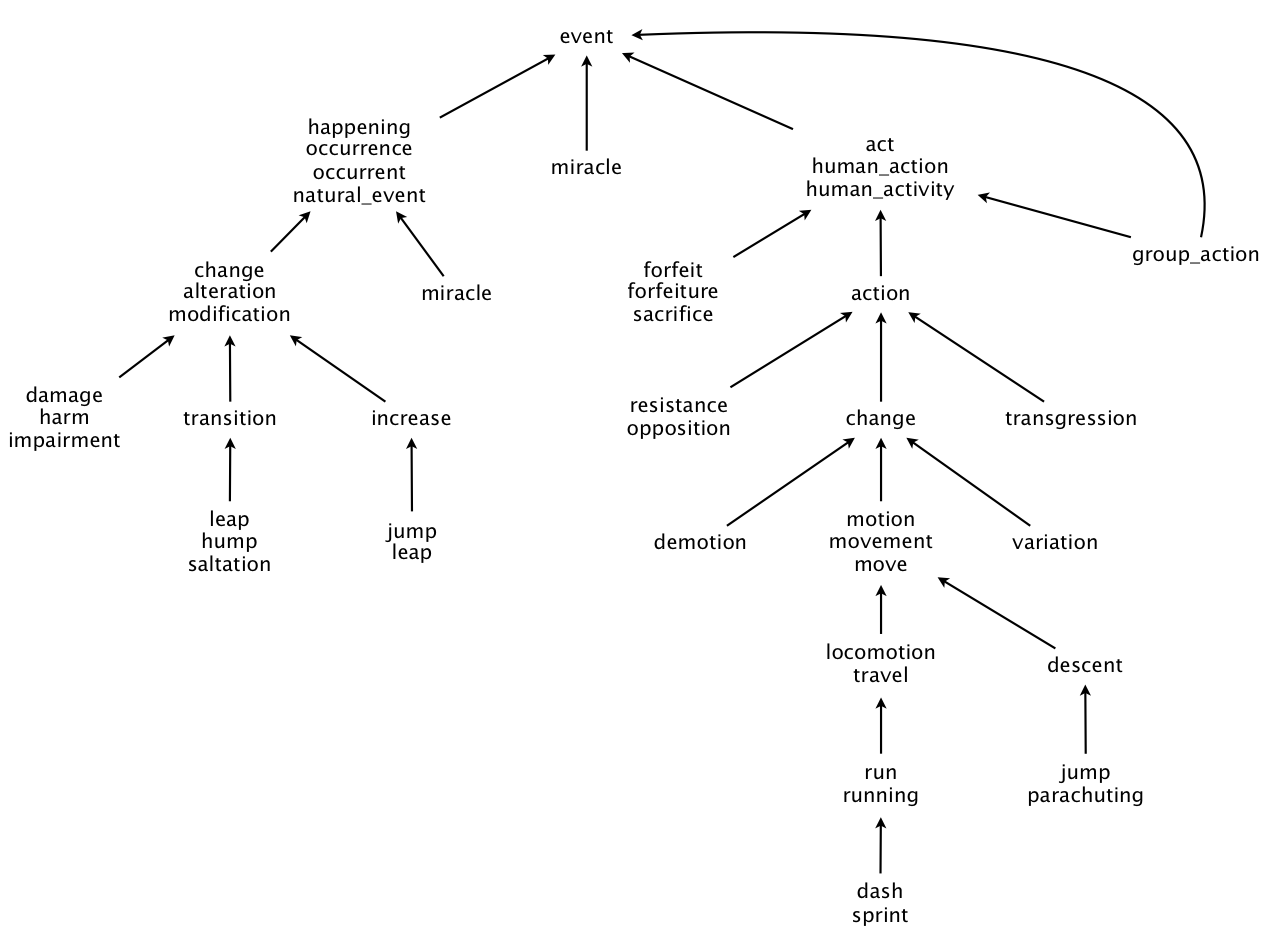
Resource: https://wordnet.princeton.edu/

In [264]:
# Defining supporting function for changing POS of NLTK to POS of Wordnet
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


In [265]:
# Extracting POS of tokens
df['wordnet_pos'] = df['defualt_postag'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df.head()

ID          created_at  ...               nouns            nouns_adjs
0  31035514 2021-03-11 15:05:00  ...               today           final today
1  31035514 2021-03-11 14:10:02  ...                call                  call
2  31035514 2021-03-11 00:00:01  ...  year spring reaso…  s year spring reaso…
3  31035514 2021-03-10 20:21:21  ...             lecture               lecture
4  31035514 2021-03-10 18:01:00  ...      rapidfire book        rapidfire book

[5 rows x 29 columns]

In [266]:
df[['defualt_postag','wordnet_pos']]

defualt_postag                                        wordnet_pos
0     [(this, DT), (is, VBZ), (it, PRP), (they, PRP)...  [(this, n), (is, v), (it, n), (they, n), (are,...
1          [(give, VB), (us, PRP), (a, DT), (call, NN)]            [(give, v), (us, n), (a, n), (call, n)]
2     [(maybe, RB), (it, PRP), (’, VBZ), (s, JJ), (b...  [(maybe, r), (it, n), (’, v), (s, a), (because...
3     [(register, NN), (now, RB), (for, IN), (this, ...  [(register, n), (now, r), (for, n), (this, n),...
4     [(viet, JJ), (thanh, NN), (nguyen, NN), (on, I...  [(viet, a), (thanh, n), (nguyen, n), (on, n), ...
...                                                 ...                                                ...
6486  [(congratulations, NNS), (to, TO), (mississaug...  [(congratulations, n), (to, n), (mississaugali...
6487  [(who, WP), (else, VBP), (loves, VBZ), (readin...  [(who, n), (else, v), (loves, v), (reading, n)...
6488  [(carriem, NN), (i, NNS), (do, VBP), (thanks, ...  [(carriem, n), (i, n), (do, v), (thanks, n), (...
6489  [(coming, VBG), (up, RP), (next, RB), (in, IN)...  [(coming, v), (up, r), (next, r), (in, n), (ou...
6490                           [(beep, NN), (beep, NN)]                             [(beep, n), (beep, n)]

[6491 rows x 2 columns]

In [267]:
# lemmatizating tokens using WordNetLemmatizer:

from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

df['lemmatized_words']=df['wordnet_pos'].apply(lambda x: [lemmatizer.lemmatize(word, tag) for word, tag in x])

df['lemmatized_text']=[' '.join(map(str,i)) for i in df['lemmatized_words']]
df.head()

ID          created_at  ...               nouns            nouns_adjs
0  31035514 2021-03-11 15:05:00  ...               today           final today
1  31035514 2021-03-11 14:10:02  ...                call                  call
2  31035514 2021-03-11 00:00:01  ...  year spring reaso…  s year spring reaso…
3  31035514 2021-03-10 20:21:21  ...             lecture               lecture
4  31035514 2021-03-10 18:01:00  ...      rapidfire book        rapidfire book

[5 rows x 29 columns]

In [268]:
# Sepehr
print(df['text1'].iloc[4])
print(df['Clean_text'].iloc[4])
print(df['lemmatized_text'].iloc[4])

viet thanh nguyen on ralph ellison alice walker and tintin  10 rapidfire book recommendations from the pulitzer… 
viet thanh nguyen ralph ellison alice walker tintin 10 rapidfire book recommendations pulitzer
viet thanh nguyen on ralph ellison alice walker and tintin 10 rapidfire book recommendation from the pulitzer…


# EDA

### Words Frequency Distribution
**FreqDist** tells us the frequency of each vocabulary item in the text. It is a "distribution" because it tells us how the total number of word tokens in the text are distributed across the vocabulary items. NLTK provides built-in support for them.

In [269]:
# change all words to lowercase and removing stop words:
# Removing stop words
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
#df['tokenized'] = df['tokenized'].apply(lambda x: [word for word in x if word not in stop])


df['lemmatized_words_clean']= df['lemmatized_words'].apply(lambda x: [word.lower() for word in x ])
df['lemmatized_words_clean'] = df['lemmatized_words_clean'].apply(lambda x: [word for word in x if word not in stop])
df['lemmatized_words_clean']

0       [final, two, book, canada, read, 2021, debate,...
1                                         [give, u, call]
2       [maybe, ’, ’, stick, inside, year, maybe, spri...
3                [register, lecture, partner, laurieredu]
4       [viet, thanh, nguyen, ralph, ellison, alice, w...
                              ...                        
6486    [congratulation, mississaugalib, excite, see, ...
6487    [else, love, reading, listen, book, kitchlibra...
6488                    [carriem, thanks, share, carriem]
6489    [come, next, winter, film, series, kitchlibrar...
6490                                         [beep, beep]
Name: lemmatized_words_clean, Length: 6491, dtype: object

In [270]:
# adding all tokes to create a list of tokens
words = df['lemmatized_words_clean']
allwords = []
for wordlist in words:
    allwords += wordlist

In [271]:
from nltk import FreqDist
max_words=100
mostcommon = FreqDist(allwords).most_common(max_words)
print(mostcommon)


[('book', 801), ('u', 693), ('library', 675), ('’', 556), ('join', 548), ('wpl', 478), ('new', 405), ('kitchlibrary', 392), ('get', 389), ('read', 366), ('day', 325), ('share', 320), ('one', 316), ('today', 281), ('make', 281), ('learn', 277), ('time', 274), ('live', 270), ('go', 269), ('great', 265), ('virtual', 262), ('event', 262), ('author', 260), ('week', 251), ('look', 248), ('year', 245), ('thanks', 243), ('free', 237), ('program', 232), ('fun', 227), ('love', 223), ('kid', 219), ('take', 218), ('story', 217), ('online', 216), ('community', 209), ('help', 206), ('amp', 206), ('know', 206), ('check', 203), ('family', 201), ('explore', 192), ('come', 174), ('home', 168), ('thank', 166), ('work', 162), ('waterloo', 160), ('open', 152), ('find', 150), ('tomorrow', 146), ('night', 144), ('start', 144), ('happy', 143), ('see', 142), ('want', 137), ('well', 137), ('world', 136), ('novel', 134), ('like', 130), ('club', 130), ('talk', 129), ('use', 127), ('good', 127), ('tonight', 126), 

### wordcloud
wordcloud is a python library for visulazing the frequency of words
Methods

*    max_words,
*    max_font_size, 
*    max_words,
*    stopwords,

A very good resouce:
https://www.datacamp.com/community/tutorials/wordcloud-python


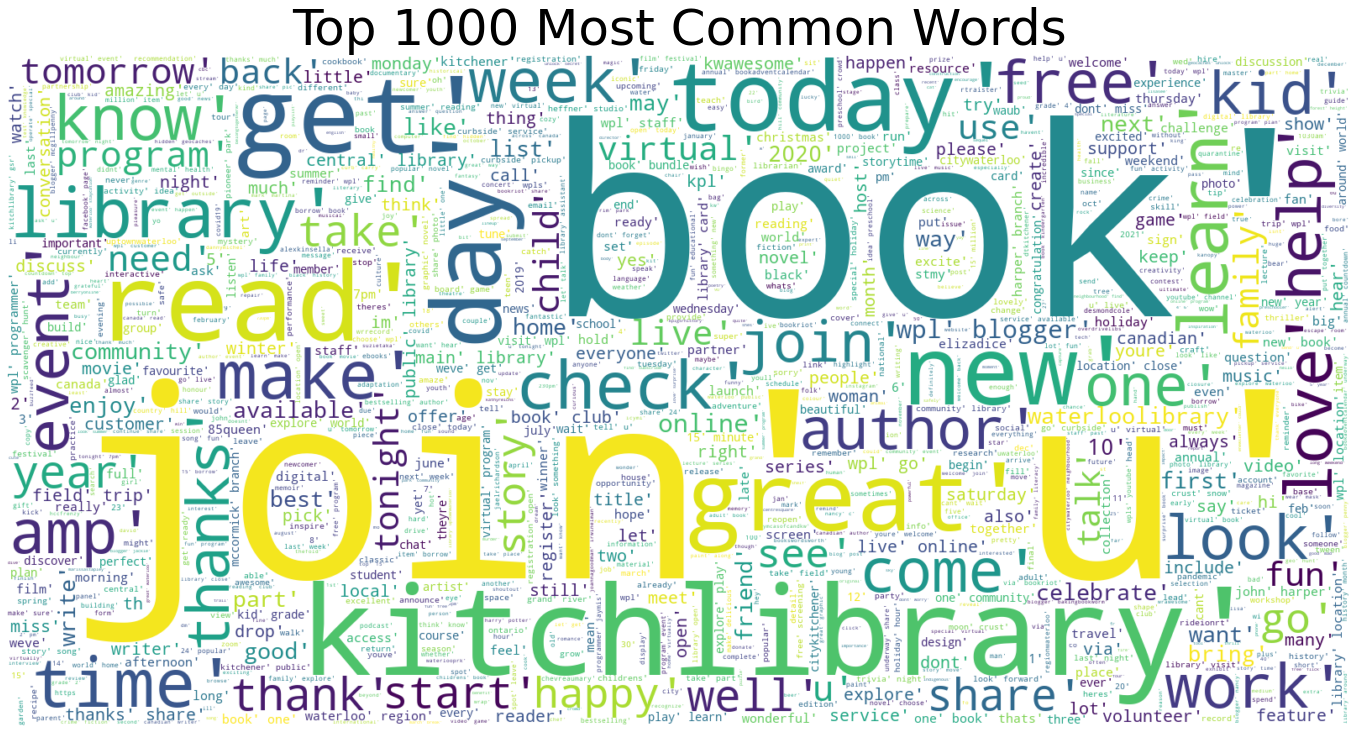

In [272]:
from wordcloud import WordCloud
max_words=1000
wordcloud = WordCloud(width=1600, height=800,
                      max_words=max_words,
                      background_color='white',
                      ).generate(str(allwords))
fig = plt.figure(figsize=(30,10))
plt.imshow(wordcloud, interpolation="bilinear")

# See https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html to find more interpolation

plt.axis('off')
plt.title(f'Top {max_words} Most Common Words', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

In [273]:
# Saving the wordcloud in a file
wordcloud.to_file("//first_review.png")

### Most Frequent hashtags 


In [274]:
df.head()

ID          created_at  ...               nouns            nouns_adjs
0  31035514 2021-03-11 15:05:00  ...               today           final today
1  31035514 2021-03-11 14:10:02  ...                call                  call
2  31035514 2021-03-11 00:00:01  ...  year spring reaso…  s year spring reaso…
3  31035514 2021-03-10 20:21:21  ...             lecture               lecture
4  31035514 2021-03-10 18:01:00  ...      rapidfire book        rapidfire book

[5 rows x 29 columns]

In [275]:
# Finding most frequent hashtgags
df['hashtags'].value_counts()

85Queen                     42
STMY                        37
kwawesome                   32
bookadventcalendar          20
ThrowbackThursday           10
                            ..
InternationalLiteracyDay     1
hockey                       1
StephenKing                  1
NancyDrew                    1
olasc                        1
Name: hashtags, Length: 481, dtype: int64

In [276]:
number_hashtags=20
hashtags_freq=df['hashtags'].value_counts()[:number_hashtags]
hashtags_freq

85Queen               42
STMY                  37
kwawesome             32
bookadventcalendar    20
ThrowbackThursday     10
KWAwesome              9
belongtogetherWR       9
RemembranceDay         9
FamilyLiteracyKW       8
booklovers             8
librarylove            8
Pride                  8
HarryPotter            8
IWD2019                7
85Green                7
MadeInHeffner          6
BlackHistoryMonth      6
BigLibraryRead         6
BellLetsTalk           6
85queen                5
Name: hashtags, dtype: int64

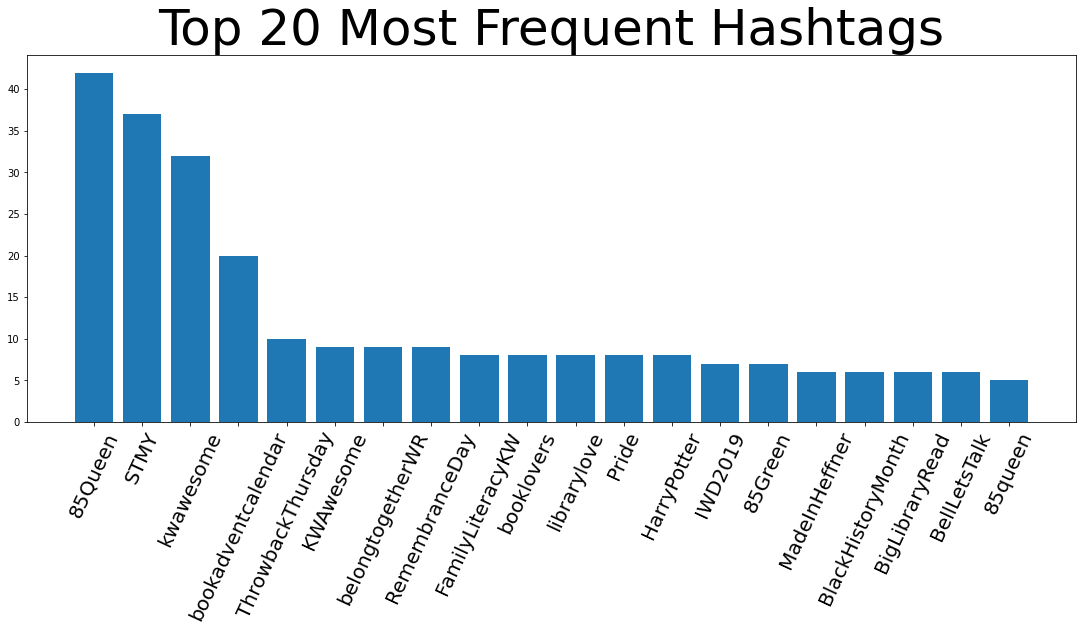

In [277]:
# Plot a bar chart showing top most frequent Hashtags
fig = plt.figure(figsize=(15,6))

plt.title(f'Top {number_hashtags} Most Frequent Hashtags', fontsize=50, )
plt.tight_layout(pad=0)

plt.bar(x=hashtags_freq.index,height=hashtags_freq.values)
plt.xticks(fontsize=20, rotation='65')
plt.show()


#### **Practice time:**
Show the 50 least frequent hashtags in the data?

In [278]:
# solution:
hashtags_freq=df['hashtags'].value_counts(ascending=True)[:50]
hashtags_freq

olasc                        1
NancyDrew                    1
StephenKing                  1
hockey                       1
InternationalLiteracyDay     1
DVDBingeBundles              1
MusicintheLounge             1
santaclausiscomingtotown     1
smile                        1
booktalks                    1
pureentertainment            1
SafeHarbour                  1
literary                     1
GoodandMad                   1
DowntonAbbey                 1
coronavirus                  1
RedDayFriday                 1
rainbowstoryfestival         1
BorrowtheInternet            1
sixtiesscoop                 1
toastwasnotsosatisfying      1
HomeforUnwantedChildten      1
BooksConnectUs               1
Oprah                        1
marchbreak                   1
TakeYourChildToTheLibrary    1
Quotes                       1
MusicInTheLounge             1
monthoflove                  1
weareTitans                  1
ScienceLiteracyWeek          1
GuardedGirls                 1
mysterie

### Sorting by value

100 Most  Frequent Hashtag

### Hashtags for 200 most retweeted tweets

In [279]:
hastags_most_retweeted=df.sort_values('retweet_count',ascending=False).iloc[:200]
hastags_most_retweeted.head()

ID  ...                                     nouns_adjs
205    31035514  ...          Today view video positive change mor…
6133  425118862  ...                                           king
3195   31035514  ...                                       hope fr…
1907   31035514  ...                                   street Happy
6063  425118862  ...  friendly gent blue coat shop hour big jar ta…

[5 rows x 29 columns]

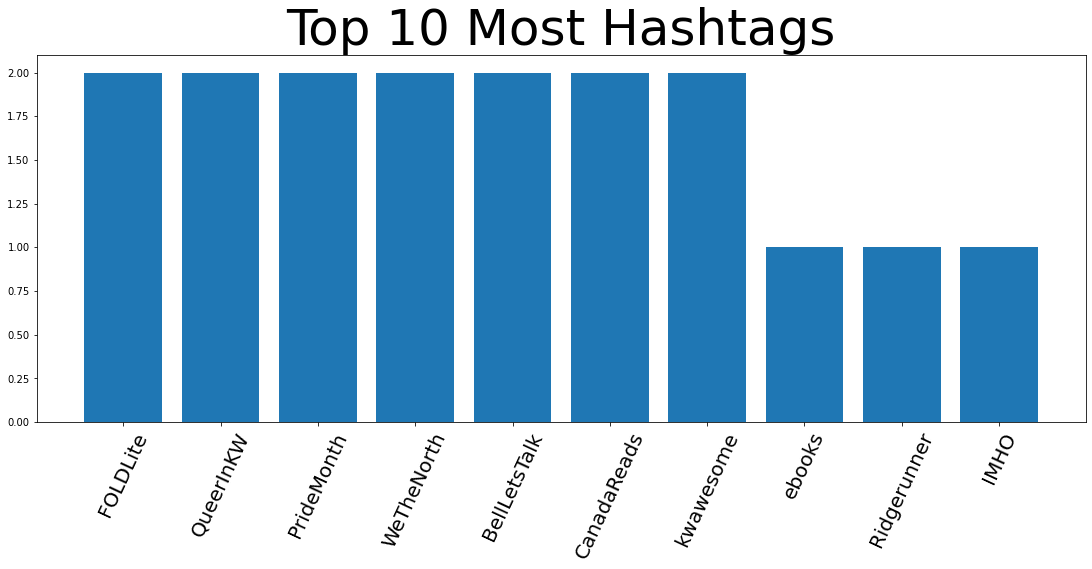

In [280]:
hastags_most_liked=df.sort_values('retweet_count',ascending=False).iloc[:200]

hashtags_freq=hastags_most_liked['hashtags'].value_counts()[0:10]

fig = plt.figure(figsize=(15,6))
#plt.axis('off')
plt.title('Top 10 Most Hashtags', fontsize=50, )
plt.tight_layout(pad=0)
#plt.xticks(hashtags_freq.index)
plt.bar(x=hashtags_freq.index,height=hashtags_freq.values)
plt.xticks(fontsize=20, rotation = '65')
plt.show()


#### **Practice time:**
Find the 100 most liked tweets? The dataframe should show the text and the number of likes for each tweets.

In [281]:
# solution:
df.sort_values('favorite_count',ascending=False).iloc[:100][['text','favorite_count']]

text  favorite_count
3433  It's official! No more overdue fines, ever! 🙌🥳...             589
4494  Thank you to everyone who reached out to us ab...             426
4947  Access to menstrual products just got a little...             403
3471  Be careful what you wish for 😉\n\nPictured: 85...             363
6407  Should the person who did this be fired y/n ht...             291
...                                                 ...             ...
6181  "This is what happens when the library hires q...              38
4547  Have a device? Have a library card? Great! Tha...              38
4758  Pro tip: Use your library card to 3D print you...              37
4635  Say hello to our growing greens! We've got let...              37
3927  "Public libraries purchase and promote a diver...              36

[100 rows x 2 columns]

#### Practice time
### Hashtags for 200 most liked tweets

Write a code to extract 10 most frequent hashtags from 200 most liked tweets and use bar chart to show them? 

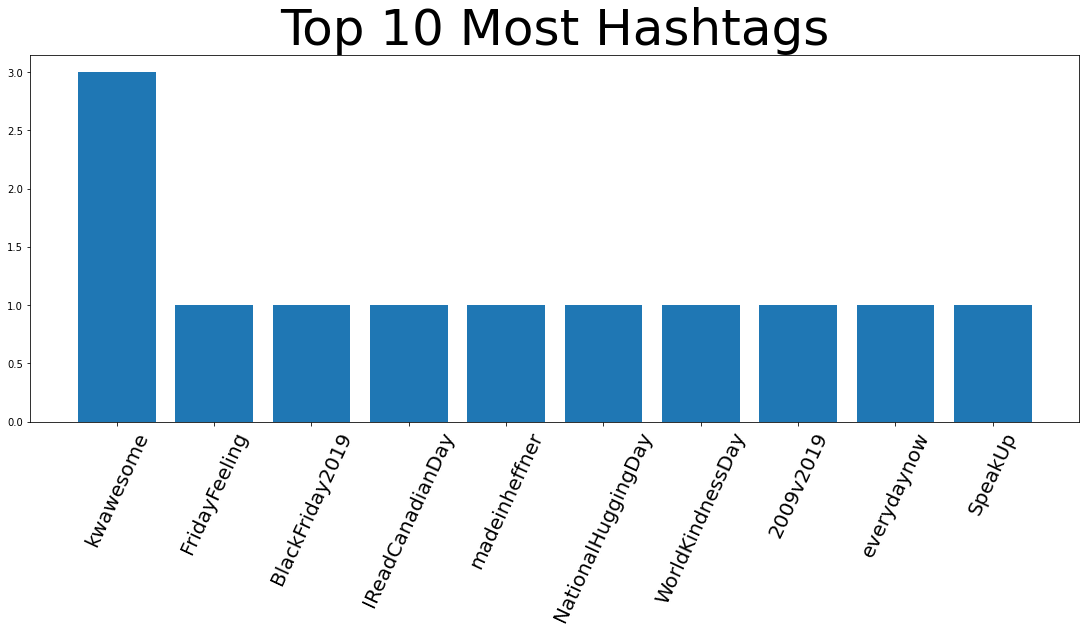

In [282]:
# Solution:

hastags_most_liked=df.sort_values('favorite_count',ascending=False).iloc[:200]

hashtags_freq=hastags_most_liked['hashtags'].value_counts()[0:10]

fig = plt.figure(figsize=(15,6))
#plt.axis('off')
plt.title('Top 10 Most Hashtags', fontsize=50, )
plt.tight_layout(pad=0)
#plt.xticks(hashtags_freq.index)
plt.bar(x=hashtags_freq.index,height=hashtags_freq.values)
plt.xticks(fontsize=20, rotation = '65')
plt.show()


### Characteristics of most Liked tweets:

In [283]:
print('The average of the number of words',df['num_words'].mean())
print('The average of the number of chars',df['num_chars'].mean())
print('The variance of the number of words',df['num_words'].var())
print('The variance of the number of chars',df['num_chars'].var())

The average of the number of words 18.72531197042058
The average of the number of chars 125.79694962255431
The variance of the number of words 26.07045165535583
The variance of the number of chars 749.6040646536973


In [284]:
hastags_most_liked=df.sort_values('favorite_count',ascending=False).iloc[:100]

In [285]:
print('The average of the number of words',hastags_most_liked['num_words'].mean())
print('The average of the number of chars',hastags_most_liked['num_chars'].mean())
print('The variance of the number of words',hastags_most_liked['num_words'].var())
print('The variance of the number of chars',hastags_most_liked['num_chars'].var())

The average of the number of words 19.29
The average of the number of chars 126.83
The variance of the number of words 54.77363636363645
The variance of the number of chars 669.2738383838395


#### Practice time:
Find a average and variance for of the num words for the 100 least liked tweets.  

In [286]:
# Solution: 
hastags_least_liked=df.sort_values('favorite_count',ascending=True).iloc[:100]
print('The average of the number of words',hastags_least_liked['num_words'].mean())
print('The average of the number of chars',hastags_least_liked['num_chars'].mean())
print('The variance of the number of words',hastags_least_liked['num_words'].var())
print('The variance of the number of chars',hastags_least_liked['num_chars'].var())

The average of the number of words 18.71
The average of the number of chars 121.64
The variance of the number of words 27.420101010101018
The variance of the number of chars 685.6670707070708


## Sentiment Analysis

**Sentiment analysis** is the process of determining the writer’s attitude or opinion ranging from -1 (negative attitude) to 1 (positive attitude). We’ll be using the TextBlob library to analyze sentiment. TextBlob’s Sentiment() function requires a string.


**TextBlob** is a Python library for processing textual data. It provides an API for di common natural language processing (NLP) tasks such as **part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation**, and more.

*   PatternAnalyzer - a default classifier that is built on the pattern library
*   NaiveBayesAnalyzer - an NLTK model trained on a movie reviews corpus




In [287]:
from textblob import TextBlob
df['sentiment']= df['lemmatized_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()

ID          created_at  ...               nouns            nouns_adjs
0  31035514 2021-03-11 15:05:00  ...               today           final today
1  31035514 2021-03-11 14:10:02  ...                call                  call
2  31035514 2021-03-11 00:00:01  ...  year spring reaso…  s year spring reaso…
3  31035514 2021-03-10 20:21:21  ...             lecture               lecture
4  31035514 2021-03-10 18:01:00  ...      rapidfire book        rapidfire book

[5 rows x 29 columns]

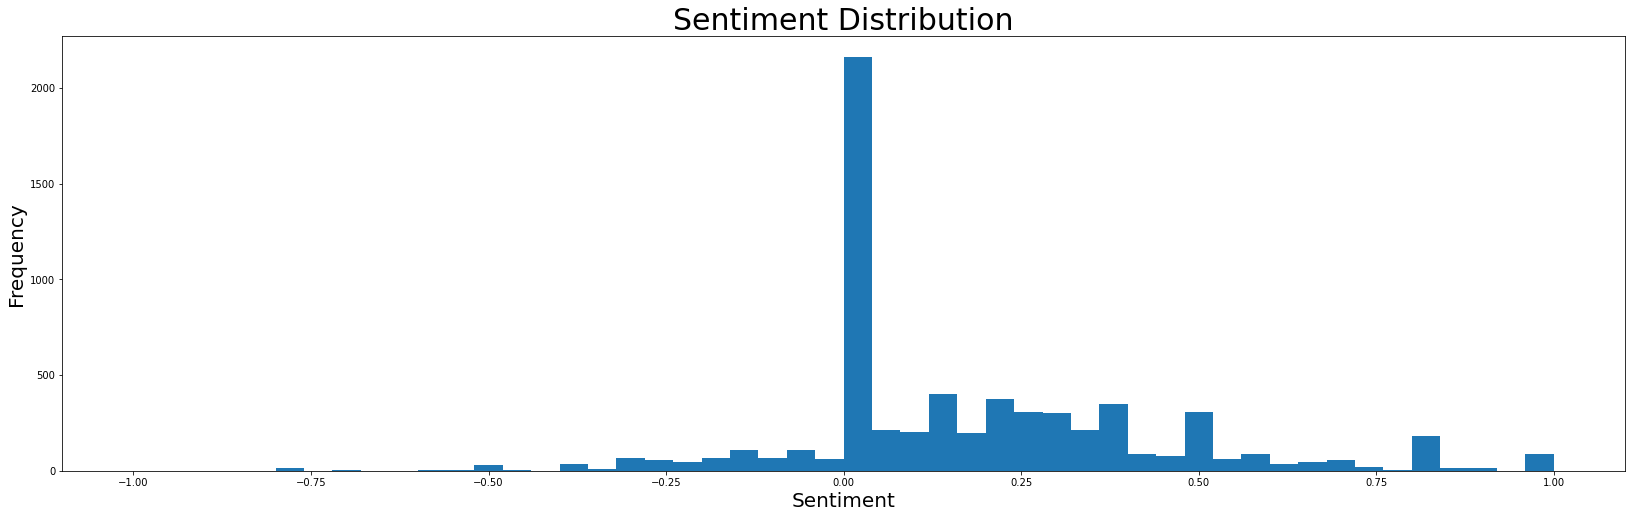

In [288]:
plt.figure(figsize=(28,8))
#plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=20)
plt.xticks(fontsize=10)
plt.ylabel('Frequency', fontsize=20)
plt.yticks(fontsize=10)
plt.hist(df['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=30)
plt.show()

Lets have a look at poitive tweets:

In [289]:
df[df['sentiment']>.7]['text'].iloc[2]

'Another wonderful Laurier EdTalk. Thank you @cathymiyata and @LaurierEdu https://t.co/IZu3ZCj1D5'

And negative tweets

In [290]:
df[df['sentiment']<-.7]['text'].iloc[0]

'The Humboldt crash was a horrible tragedy felt all across Canada. @KalebDahlgren , Humboldt crash survivor, has a n… https://t.co/vz4jYwe69v'

### Most Frequent words with positive sentiment

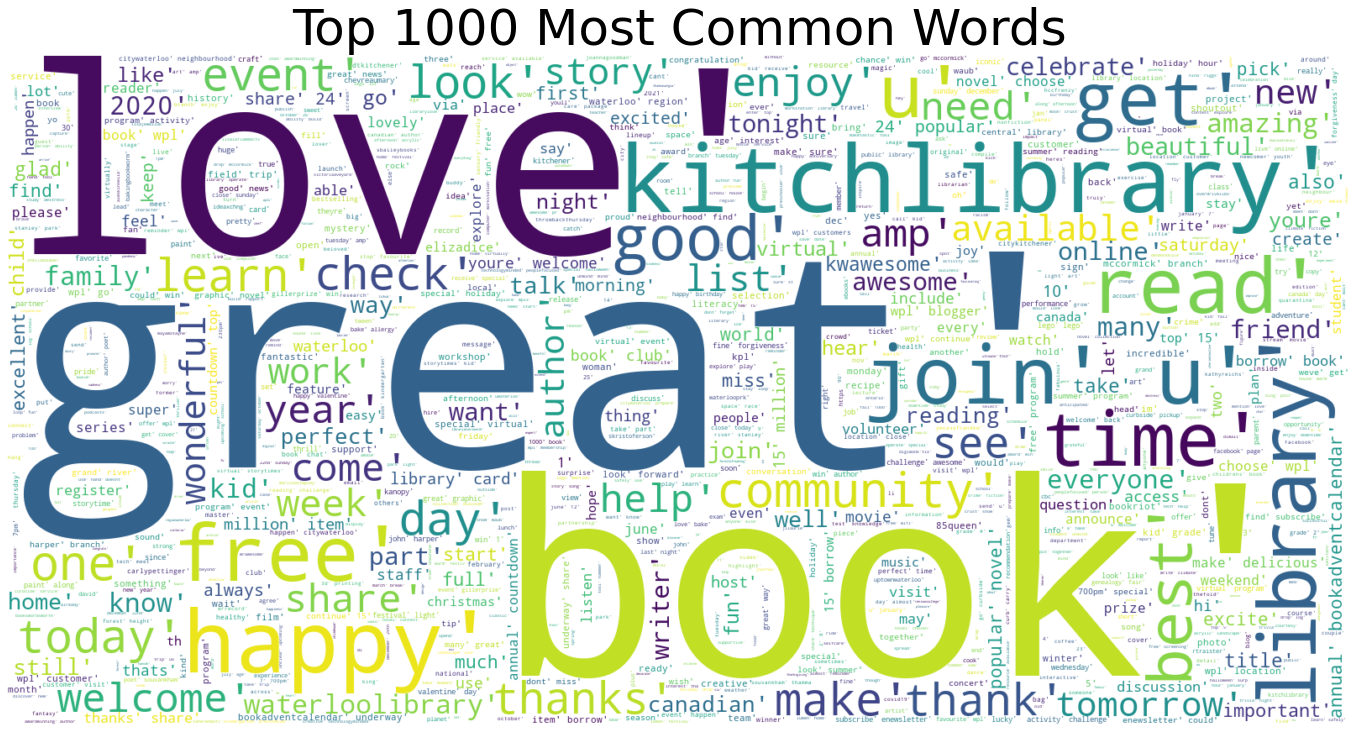

In [291]:
words = df[df['sentiment']>0.33]['lemmatized_words_clean']
allwords = []
for wordlist in words:
    allwords += wordlist


wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(words))
max_words=1000
wordcloud = WordCloud(width=1600, height=800,
                      max_words=max_words,
                      background_color='white',
                      ).generate(str(allwords))




fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title(f'Top {max_words} Most Common Words', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

### Most Fequent words with negative sentiment

110


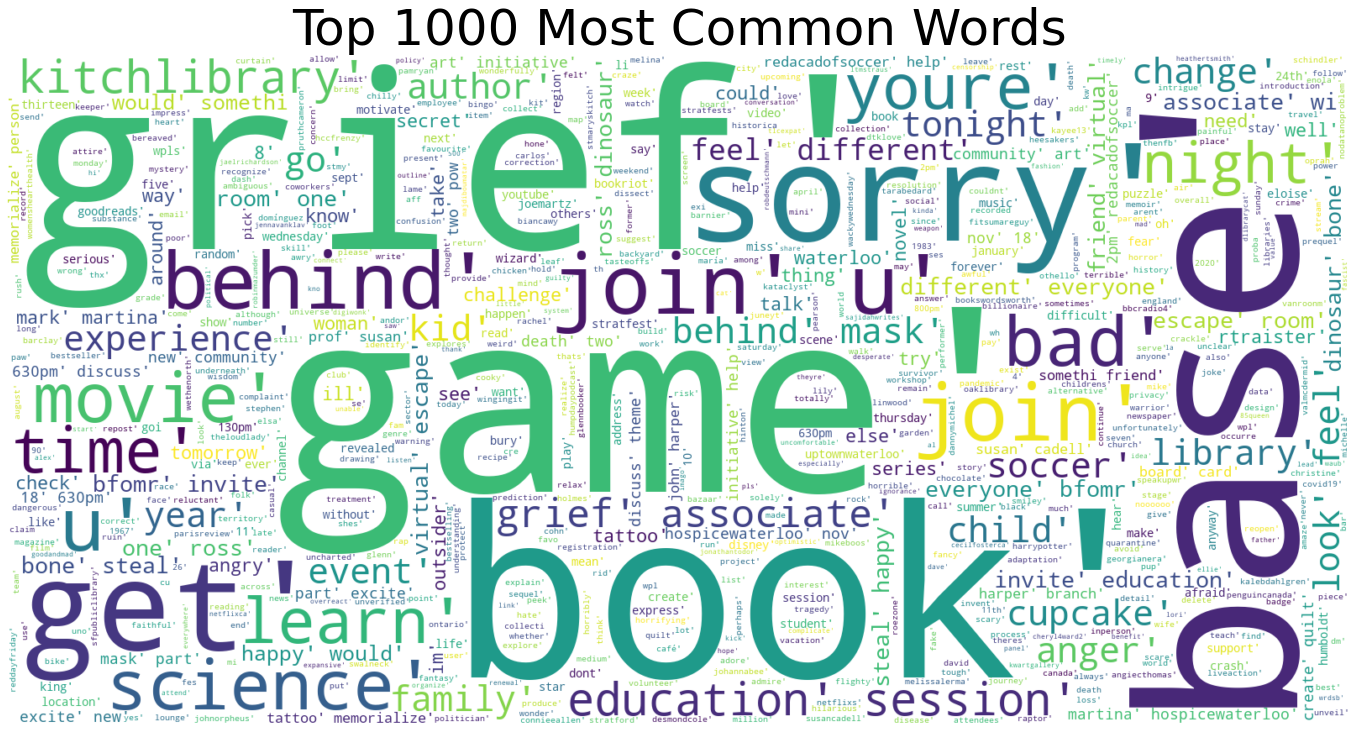

In [292]:
words = df[df['sentiment']<-0.33]['lemmatized_words_clean']
print(len(words))
allwords = []
for wordlist in words:
    allwords += wordlist
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(words))
max_words=1000
wordcloud = WordCloud(width=1600, height=800,
                      max_words=max_words,
                      background_color='white',
                      ).generate(str(allwords))



fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title(f'Top {max_words} Most Common Words', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

### Characteristics of positive and negative tweets 

In [293]:
positive_tweets= df[df['sentiment']>0.33]
print('The average of the number of words',positive_tweets['num_words'].mean())
print('The average of the number of chars',positive_tweets['num_chars'].mean())
print('The variance of the number of words',positive_tweets['num_words'].var())
print('The variance of the number of chars',positive_tweets['num_chars'].var())

The average of the number of words 18.627935723114955
The average of the number of chars 124.52904820766378
The variance of the number of words 23.010523998339597
The variance of the number of chars 681.9685434349057


In [294]:
negative_tweets=df[df['sentiment']<-0.33]
print('The average of the number of words',negative_tweets['num_words'].mean())
print('The average of the number of chars',negative_tweets['num_chars'].mean())
print('The variance of the number of words',negative_tweets['num_words'].var())
print('The variance of the number of chars',negative_tweets['num_chars'].var())

The average of the number of words 19.272727272727273
The average of the number of chars 126.71818181818182
The variance of the number of words 18.95246038365305
The variance of the number of chars 620.497831526272


## Group By

### number of hashtags in a tweet vs how many likes they get

In [295]:
# Lets remove the duplicate twweets
df.duplicated(subset='text',keep='first')
df.head(3)

ID          created_at  ...               nouns            nouns_adjs
0  31035514 2021-03-11 15:05:00  ...               today           final today
1  31035514 2021-03-11 14:10:02  ...                call                  call
2  31035514 2021-03-11 00:00:01  ...  year spring reaso…  s year spring reaso…

[3 rows x 29 columns]

In [296]:
df.groupby('hashtags')

In [297]:
df.groupby('hashtags').agg({'favorite_count': np.sum})

favorite_count
hashtags                                    
1eReadLivrelCanada                         0
2009v2019                                132
2021Census                                 0
365ofgoodWR                                0
3Dprint                                    0
...                                      ...
wrdsbesl                                   0
writers                                    1
youngreadersarefutureleaders               2
ywkw                                       0
zoo                                        0

[481 rows x 1 columns]

In [298]:
df.groupby('hashtags').agg({'favorite_count': np.sum}).sort_values('favorite_count', ascending=False)

favorite_count
hashtags                        
kwawesome                    710
STMY                         247
85Queen                      223
2009v2019                    132
belongtogetherWR              69
...                          ...
TuesdayThoughts                0
TurtleTuesday                  0
UWaterloo                      0
UWaterloo3MT                   0
zoo                            0

[481 rows x 1 columns]

### Comparing Kitchener and Waterloo Libraries: 

In [299]:
screen_name=df.groupby('screen_name').agg({'favorite_count':np.mean})
screen_name.head(5)


favorite_count
screen_name                    
KitchLibrary           6.271662
WaterlooLibrary        2.971059

#### Practice time:
Using screen_name, group data by and compare Kichener and Waterloo libraries in terms of the average number of likes, retweets, the number of followers, and friends. Show the results in a framework.


In [300]:
# Solution:
screen_name=df.groupby('screen_name').agg({'favorite_count':np.mean,'retweet_count': np.mean, 'followers_count': np.mean, 'friends_count': np.mean})
screen_name.head()

favorite_count  retweet_count  followers_count  friends_count
screen_name                                                                   
KitchLibrary           6.271662      37.963922     12470.925994           2973
WaterlooLibrary        2.971059      60.899631      8041.000000           7171

# Topic Modeling
**Topic Modeling:** Topic modeling is a type of ***statistical modeling*** for discovering the abstract “topics” that occur in a collection of documents.


**Latent Dirichlet Allocation (LDA):** Latent Dirichlet Allocation is an technique for topic modeling and is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions.


In [301]:
import pickle
import gensim
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Use CountVectorizor to find three letter tokens, remove stop_words, 
# remove tokens that don't appear in at least 20 documents,
# remove tokens that appear in more than 20% of the documents
vect = CountVectorizer(ngram_range=(1,2),
                       min_df=20, 
                       max_df=0.2, 
                       stop_words='english', 
                       )
#vect=TfidfVectorizer(lowercase=True,ngram_range=(1,2),min_df=10, max_df=0.2, stop_words='english', 
#                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df['text1'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())


In [302]:
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=3, id2word=id_map, passes=10, random_state=34)
ldamodel.print_topics()
#ldamodel.show_topics(num_topics=10, num_words=10, log=False, formatted=True)

[(0,
  '0.021*"know" + 0.018*"virtual" + 0.018*"learn" + 0.018*"fun" + 0.017*"home" + 0.014*"join" + 0.014*"week" + 0.014*"reading" + 0.013*"waterloo" + 0.012*"community"'),
 (1,
  '0.055*"kitchlibrary" + 0.037*"library" + 0.030*"new" + 0.030*"day" + 0.024*"great" + 0.020*"today" + 0.018*"books" + 0.018*"thank" + 0.014*"time" + 0.013*"read"'),
 (2,
  '0.031*"thanks" + 0.027*"book" + 0.026*"join" + 0.019*"library" + 0.018*"free" + 0.016*"live" + 0.014*"central" + 0.014*"march" + 0.014*"85queen" + 0.013*"dont"')]

## Fine Tuning
Parameters that cane be modified:
*    The number of topics
*    The part of speech:

     *One popular way is to look only at terms that are from one part of speech (nouns, verbs,or adjectives). Then add more to find if meaningful topics appears.*
*    The number of passes:

      *Increasing the number of passess results in more robust words distributions.*

**LDA for noun words**

In [304]:
# creating a list of Nouns
df['nouns']=df['defualt_postag'].apply(lambda x:[word for (word,pos) in x if pos == 'NN'])
df['nouns']=[' '.join(map(str,i)) for i in df['nouns']]
df['nouns']

0                                   canada today et book…
1                                                    call
2                                      year spring reaso…
3                             register lecture laurieredu
4       thanh nguyen ralph ellison alice walker rapidf...
                              ...                        
6486                                         donation pu…
6487                       reading kitchlibrary libby app
6488                                      carriem carriem
6489                                   winter film series
6490                                            beep beep
Name: nouns, Length: 6491, dtype: object

In [305]:
# Number of topics =2 
vect = CountVectorizer(ngram_range=(1,2),
                       min_df=20, 
                       max_df=0.2, 
                       stop_words='english' 
                       )
#vect=TfidfVectorizer(lowercase=True,ngram_range=(1,2),min_df=10, max_df=0.2, stop_words='english', 
#                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df['nouns'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=2, id2word=id_map, passes=10, random_state=34)
ldamodel.print_topics()

[(0,
  '0.057*"day" + 0.038*"event" + 0.035*"community" + 0.028*"thank" + 0.026*"join" + 0.024*"tomorrow" + 0.024*"night" + 0.024*"home" + 0.022*"author" + 0.021*"family"'),
 (1,
  '0.066*"book" + 0.054*"library" + 0.048*"today" + 0.043*"time" + 0.029*"wpl" + 0.027*"kitchlibrary" + 0.020*"year" + 0.018*"fun" + 0.017*"program" + 0.016*"series"')]

In [317]:
# Number of topics =3
vect = CountVectorizer(ngram_range=(1,2),
                       min_df=20, 
                       max_df=0.2, 
                       stop_words='english'
                       )
#vect=TfidfVectorizer(lowercase=True,ngram_range=(1,2),min_df=10, max_df=0.2, stop_words='english', 
#                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df['nouns'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=3, id2word=id_map, passes=10, random_state=34)
ldamodel.print_topics()

[(0,
  '0.073*"library" + 0.057*"time" + 0.040*"tomorrow" + 0.040*"book" + 0.039*"event" + 0.037*"home" + 0.028*"rtraister" + 0.026*"kitchlibrary" + 0.025*"music" + 0.023*"program"'),
 (1,
  '0.070*"today" + 0.048*"week" + 0.042*"community" + 0.037*"family" + 0.032*"wpl" + 0.025*"world" + 0.025*"day" + 0.024*"series" + 0.024*"share" + 0.023*"reading"'),
 (2,
  '0.061*"day" + 0.050*"book" + 0.044*"join" + 0.041*"thank" + 0.036*"night" + 0.033*"author" + 0.027*"youre" + 0.024*"year" + 0.023*"pm" + 0.021*"conversation"')]

In [307]:
# Number of topics =4
vect = CountVectorizer(ngram_range=(1,2),
                       min_df=20, 
                       max_df=0.2, 
                       stop_words='english' 
                       )
#vect=TfidfVectorizer(lowercase=True,ngram_range=(1,2),min_df=10, max_df=0.2, stop_words='english', 
#                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df['nouns'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=4, id2word=id_map, passes=10, random_state=34)
ldamodel.print_topics()

[(0,
  '0.075*"event" + 0.072*"book" + 0.051*"tomorrow" + 0.048*"night" + 0.033*"join" + 0.032*"music" + 0.026*"registration" + 0.024*"story" + 0.024*"list" + 0.024*"month"'),
 (1,
  '0.089*"library" + 0.079*"today" + 0.071*"time" + 0.061*"community" + 0.049*"week" + 0.035*"youre" + 0.034*"rtraister" + 0.028*"program" + 0.025*"online" + 0.024*"book"'),
 (2,
  '0.064*"thank" + 0.056*"kitchlibrary" + 0.054*"home" + 0.047*"march" + 0.047*"fun" + 0.035*"world" + 0.035*"family" + 0.033*"conversation" + 0.032*"series" + 0.031*"reading"'),
 (3,
  '0.145*"day" + 0.062*"wpl" + 0.057*"author" + 0.040*"year" + 0.034*"amp" + 0.029*"dont" + 0.029*"park" + 0.028*"book" + 0.024*"film" + 0.022*"life"')]

***LDA for Nouns and Adjectives***

In [308]:
# creating a list of Nouns
df['nouns_adjs']=df['defualt_postag'].apply(lambda x:[word for (word,pos) in x if pos == 'NN' or pos == 'JJ' ])

#for wordlist in words:
#    ' '.join(wordlist)
#len(wordlist)
df['nouns_adjs']=[' '.join(map(str,i)) for i in df['nouns_adjs']]
df['nouns_adjs']

0                             final canada today et book…
1                                                    call
2                                    s year spring reaso…
3                             register lecture laurieredu
4       viet thanh nguyen ralph ellison alice walker r...
                              ...                        
6486                                generous donation pu…
6487              reading kitchlibrary libby app canadian
6488                                      carriem carriem
6489    winter film series kitchlibrary tim documentar...
6490                                            beep beep
Name: nouns_adjs, Length: 6491, dtype: object

In [309]:
df['text'].iloc[3]

'Register now for this lecture with our partners from @LaurierEdu at: https://t.co/oGLyuJd3DF https://t.co/kpWT0AsDTx'

In [310]:
# Number of topics =2 
vect = CountVectorizer(ngram_range=(1,2),
                       min_df=20, 
                       max_df=0.2, 
                       stop_words='english'
                       )
#vect=TfidfVectorizer(lowercase=True,ngram_range=(1,2),min_df=10, max_df=0.2, stop_words='english', 
#                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df['nouns_adjs'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=2, id2word=id_map, passes=10, random_state=34)
ldamodel.print_topics()

[(0,
  '0.063*"kitchlibrary" + 0.041*"new" + 0.041*"book" + 0.024*"community" + 0.018*"central" + 0.018*"live" + 0.017*"wpl" + 0.016*"author" + 0.016*"amp" + 0.014*"join"'),
 (1,
  '0.069*"library" + 0.038*"day" + 0.027*"today" + 0.025*"time" + 0.024*"great" + 0.022*"good" + 0.020*"event" + 0.020*"free" + 0.019*"thank" + 0.016*"week"')]

In [311]:
# Number of topics =3 
vect = CountVectorizer(ngram_range=(1,2),
                       min_df=20, 
                       max_df=0.2, 
                       stop_words='english', 
                       )
#vect=TfidfVectorizer(lowercase=True,ngram_range=(1,2),min_df=10, max_df=0.2, stop_words='english', 
#                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df['nouns_adjs'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=3, id2word=id_map, passes=10, random_state=34)
ldamodel.print_topics()

[(0,
  '0.104*"kitchlibrary" + 0.049*"book" + 0.023*"author" + 0.021*"waterloo" + 0.021*"rtraister" + 0.018*"wpl" + 0.018*"saturday" + 0.018*"event" + 0.016*"world" + 0.016*"conversation"'),
 (1,
  '0.057*"day" + 0.037*"library" + 0.028*"thank" + 0.026*"virtual" + 0.022*"home" + 0.022*"event" + 0.021*"week" + 0.020*"happy" + 0.019*"youre" + 0.017*"public"'),
 (2,
  '0.062*"library" + 0.055*"new" + 0.033*"community" + 0.029*"today" + 0.027*"great" + 0.025*"live" + 0.025*"central" + 0.023*"time" + 0.022*"amp" + 0.021*"online"')]

In [315]:
# Number of topics =3 
vect = CountVectorizer(ngram_range=(1,2),
                       min_df=20, 
                       max_df=0.2, 
                       stop_words='english', 
                       )
#vect=TfidfVectorizer(lowercase=True,ngram_range=(1,2),min_df=10, max_df=0.2, stop_words='english', 
#                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df['nouns_adjs'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=3, id2word=id_map, passes=25, random_state=34)
ldamodel.print_topics()

[(0,
  '0.096*"kitchlibrary" + 0.052*"book" + 0.027*"author" + 0.022*"waterloo" + 0.021*"wpl" + 0.019*"world" + 0.018*"rtraister" + 0.017*"saturday" + 0.016*"series" + 0.016*"event"'),
 (1,
  '0.052*"day" + 0.035*"library" + 0.028*"virtual" + 0.027*"week" + 0.026*"thank" + 0.023*"home" + 0.023*"fun" + 0.021*"family" + 0.021*"event" + 0.020*"happy"'),
 (2,
  '0.061*"library" + 0.058*"new" + 0.033*"community" + 0.029*"today" + 0.028*"great" + 0.027*"live" + 0.023*"central" + 0.023*"online" + 0.023*"time" + 0.021*"amp"')]

In [312]:
# Number of topics =4 
vect = CountVectorizer(ngram_range=(1,2),
                       min_df=20, 
                       max_df=0.2, 
                       stop_words='english' 
                       )
#vect=TfidfVectorizer(lowercase=True,ngram_range=(1,2),min_df=10, max_df=0.2, stop_words='english', 
#                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df['nouns_adjs'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=4, id2word=id_map, passes=10, random_state=34)
ldamodel.print_topics()

[(0,
  '0.127*"kitchlibrary" + 0.041*"event" + 0.039*"book" + 0.038*"great" + 0.032*"amp" + 0.026*"rtraister" + 0.020*"author" + 0.019*"series" + 0.019*"amazing" + 0.016*"month"'),
 (1,
  '0.059*"day" + 0.041*"thank" + 0.039*"library" + 0.032*"virtual" + 0.029*"happy" + 0.025*"public" + 0.025*"tonight" + 0.024*"music" + 0.021*"program" + 0.020*"reading"'),
 (2,
  '0.093*"library" + 0.049*"today" + 0.045*"free" + 0.044*"time" + 0.040*"good" + 0.032*"central" + 0.032*"live" + 0.027*"online" + 0.027*"march" + 0.024*"central library"'),
 (3,
  '0.084*"new" + 0.052*"wpl" + 0.042*"community" + 0.033*"home" + 0.030*"family" + 0.029*"book" + 0.026*"youre" + 0.026*"waterloo" + 0.023*"year" + 0.021*"world"')]

In [319]:
# Number of topics =4 
vect = CountVectorizer(ngram_range=(1,2),
                       min_df=20, 
                       max_df=0.2, 
                       stop_words='english', 
                       )
#vect=TfidfVectorizer(lowercase=True,ngram_range=(1,2),min_df=10, max_df=0.2, stop_words='english', 
#                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df['nouns_adjs'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=4, id2word=id_map, passes=25, random_state=34)
ldamodel.print_topics()

[(0,
  '0.101*"library" + 0.077*"new" + 0.054*"free" + 0.031*"central" + 0.023*"central library" + 0.021*"public" + 0.021*"today" + 0.020*"pm" + 0.017*"amp" + 0.016*"available"'),
 (1,
  '0.063*"wpl" + 0.044*"good" + 0.034*"today" + 0.031*"family" + 0.030*"library" + 0.026*"time" + 0.024*"home" + 0.023*"rtraister" + 0.023*"week" + 0.022*"music"'),
 (2,
  '0.109*"kitchlibrary" + 0.057*"great" + 0.051*"day" + 0.026*"happy" + 0.026*"march" + 0.025*"waterloo" + 0.023*"youre" + 0.016*"amazing" + 0.016*"story" + 0.016*"night"'),
 (3,
  '0.080*"book" + 0.039*"join" + 0.038*"virtual" + 0.036*"live" + 0.035*"thank" + 0.033*"event" + 0.031*"community" + 0.031*"author" + 0.023*"online" + 0.021*"tonight"')]

In [320]:
new_doc= ["Waterloo Public Library will have an event for kids. The event will start at 5 PM and close at 8 PM, tomorrow. It is free for Waterloo community."]
def topic_distribution():
    
    # Fit and transform
    xx = vect.transform(new_doc)
    
    # Convert sparse matrix to gensim corpus.
    x_corpus = gensim.matutils.Sparse2Corpus(xx, documents_columns=False)
    
    # Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
    id_map = dict((v, k) for k, v in vect.vocabulary_.items())

    #print()
    #print(ldamodel[x_corpus])
    
    return list(ldamodel[x_corpus])[0] 
topic_distribution()

[(0, 0.53286785), (1, 0.019378424), (2, 0.26195762), (3, 0.18579613)]